more data and stratified fold

In [27]:
from os.path import join
from os import makedirs
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from coreml.utils.io import save_yml, read_yml

In [2]:
data_root = '/data/siim-isic-melanoma/processed/'

In [3]:
train_df = pd.read_csv(join(data_root, 'train_big.csv'))
test_df = pd.read_csv(join(data_root, 'test.csv'))

In [4]:
train_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,source
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,2020
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,2020
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,2020
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,2020
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,2020


In [6]:
len(train_df), len(test_df)

(59037, 10982)

In [7]:
version_save_dir = join(data_root, 'versions')
makedirs(version_save_dir, exist_ok=True)

In [96]:
version_name = 'v2.0-256x256.yml'
version_save_path = join(version_save_dir, version_name)

In [97]:
names = train_df['image_name'].values
targets = train_df['target'].values

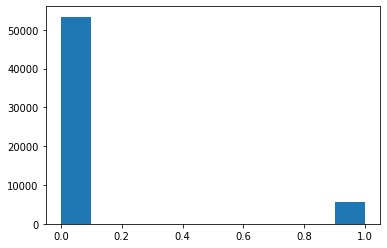

In [98]:
plt.hist(targets);

In [99]:
train_names, val_names, train_labels, val_labels = train_test_split(names, targets, test_size=0.02, random_state=0)

In [100]:
len(train_names), len(train_labels), len(val_names), len(val_labels)

(57856, 57856, 1181, 1181)

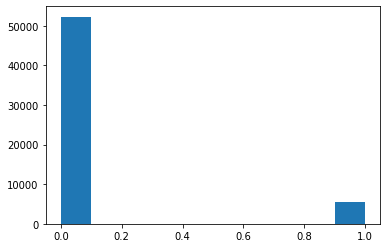

In [101]:
plt.hist(train_labels);

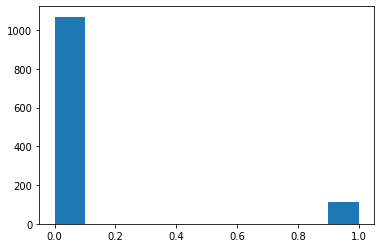

In [102]:
plt.hist(val_labels);

In [103]:
assert not [name for name in train_names if name in val_names]

In [104]:
train_files = [join(data_root, 'images-256x256', f'{name}.jpg') for name in train_names]
train_labels = [{'classification': label.tolist()} for label in train_labels]

In [105]:
type(train_labels[0]['classification'])

int

In [106]:
df_train = pd.DataFrame({'file': train_files, 'label': train_labels})

In [107]:
df_train.head()

,file,label
0,/data/siim-isic-melanoma/processed/images-256x...,{'classification': 0}
1,/data/siim-isic-melanoma/processed/images-256x...,{'classification': 0}
2,/data/siim-isic-melanoma/processed/images-256x...,{'classification': 0}
3,/data/siim-isic-melanoma/processed/images-256x...,{'classification': 0}
4,/data/siim-isic-melanoma/processed/images-256x...,{'classification': 0}


In [108]:
val_files = [join(data_root, 'images-256x256', f'{name}.jpg') for name in val_names]
val_labels = [{'classification': label.tolist()} for label in val_labels]

In [109]:
df_val = pd.DataFrame({'file': val_files, 'label': val_labels})

In [110]:
df_val.head()

,file,label
0,/data/siim-isic-melanoma/processed/images-256x...,{'classification': 0}
1,/data/siim-isic-melanoma/processed/images-256x...,{'classification': 1}
2,/data/siim-isic-melanoma/processed/images-256x...,{'classification': 1}
3,/data/siim-isic-melanoma/processed/images-256x...,{'classification': 1}
4,/data/siim-isic-melanoma/processed/images-256x...,{'classification': 0}


In [111]:
len(df_train), len(df_val)

(57856, 1181)

In [112]:
assert len(df_train) + len(df_val) == len(train_df)

In [113]:
test_files = [join(data_root, 'images-256x256', f'{file}.jpg') for file in test_df['image_name'].values]

In [114]:
df_test = pd.DataFrame({'file': test_files})

In [115]:
df_test.head()

,file
0,/data/siim-isic-melanoma/processed/images-256x...
1,/data/siim-isic-melanoma/processed/images-256x...
2,/data/siim-isic-melanoma/processed/images-256x...
3,/data/siim-isic-melanoma/processed/images-256x...
4,/data/siim-isic-melanoma/processed/images-256x...


In [116]:
len(df_test)

10982

In [117]:
assert len(df_test) == len(test_df)

In [118]:
version = dict()

In [119]:
version['train'] = {
    'file': df_train['file'].values.tolist(),
    'label': df_train['label'].values.tolist()
}

In [120]:
version['val'] = {
    'file': df_val['file'].values.tolist(),
    'label': df_val['label'].values.tolist()
}

In [121]:
version['test'] = {
    'file': df_test['file'].values.tolist(),
    # adding dummy label just to be compatible with the data format
    'label': [{'classification': 0}] * len(df_test['file'])
}

In [122]:
save_yml(version_save_path, version)